In [8]:
import torch
import os
import matplotlib.pyplot as plt
import re
import imageio
import random
from PIL import Image
import numpy as np
from tqdm import tqdm
import dataloader
import cv2

In [3]:
FP_UCF101 = 'created_datasets/ucf101/'

In [18]:
files = os.listdir(FP_UCF101)

In [5]:
def get_filename_parts(file):
    base, f, ext = re.findall(r'(v_.+__\d+)_(\d+)\.(.+)', file)[0]
    return base, f, ext

In [7]:
def get_basenames(files):
    basenames = []
    exts = []
    for file in files:
        base, _, ext = get_filename_parts(file)
        basenames.append(base)
        exts.append(ext)
        
    return list(zip(basenames, exts))

basenames = get_basenames(files)

In [11]:
def ucf101_generator(files, k=1, quadratic=False):
    
    if quadratic:
        image_ids = [0,1,3,4]
        gt = 2
    else:
        image_ids = [0,2]
        gt = 1
    
    for filebase, ext in files:
        frames = []
        
        for i in image_ids:
            filepath = os.path.join(FP_UCF101, f'{filebase}_{i}.{ext}')
            img = torch.Tensor(imageio.imread(filepath))
            frames.append(img)
            
        # load gt
        filepath = os.path.join(FP_UCF101, f'{filebase}_{gt}.{ext}')
        img = torch.Tensor(imageio.imread(filepath))
        
        
        yield frames, img
            
            

In [12]:
gen = generator(basenames)

In [13]:
test = next(gen)

In [12]:
d = ['im1.png', 'im2.png', 'im3.png', 'im4.png', 'im5.png', 'im6.png', 'im7.png']

In [17]:
basedir = 'created_datasets/vimeo_test_clean/sequences'
folders = os.listdir(basedir)

folderpaths = []

for folder in folders:
    subfolders = os.listdir(os.path.join(basedir, folder))
    
    for subfolder in subfolders:
        path = os.path.join(basedir, folder, subfolder)
        
        folderpaths.append(path)

In [69]:
def get_folderpaths_vimeo90k():
    basedir = 'created_datasets/vimeo_test_clean/sequences'
    folders = os.listdir(basedir)

    folderpaths = []

    for folder in folders:
        subfolders = os.listdir(os.path.join(basedir, folder))

        for subfolder in subfolders:
            path = os.path.join(basedir, folder, subfolder)

            folderpaths.append(path)
    
    return folderpaths

get_folderpaths_vimeo90k()

['created_datasets/vimeo_test_clean/sequences\\00001\\0266',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0268',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0275',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0278',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0285',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0287',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0291',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0619',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0622',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0625',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0627',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0628',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0629',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0632',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0636',
 'created_datasets/vimeo_test_clean/sequences\\00001\\0638',
 'created_datasets/vimeo

In [52]:
def vimeo90k_generator(folderpaths, k=1, quadratic=False):
    
    if quadratic:
        image_ids = [2,3,5,6]
        gt = 4
    else:
        image_ids = [3,5]
        gt = 4
        
    random.shuffle(folderpaths)
    X = []
    
    for folderpath in folderpaths:
        filepath = os.path.join(folderpath, 'im{0}.png')
        
        for ind in image_ids:
            img = Image.open(filepath.format(ind))
            img = torch.Tensor(np.array(img))
            X.append(img)
        img = Image.open(filepath.format(gt))
        y = torch.Tensor(np.array(img))   
        
        yield X, y
        
    

In [30]:
res = []
for xs, y in tqdm(dataloader.vimeo90k_generator(quadratic=False)):
    for img in xs:
        res.append(img.shape)
    res.append(y.shape)
        

7824it [01:28, 87.96it/s]


In [31]:
set(res)

{torch.Size([256, 448, 3])}

In [28]:
fpss = []
# check fps
for video in tqdm(os.listdir('datasets/Adobe240/original_high_fps_videos/')):
    filepath = os.path.join('datasets/Adobe240/original_high_fps_videos', video)

    if filepath.endswith('DS_Store'):
        continue
        
#     print(filepath)
    cap = cv2.VideoCapture(filepath)
    fps = cap.get(cv2.CAP_PROP_FPS)
    fpss.append(fps)
    
#     print(cap.isOpened())
    

100%|████████████████████████████████████████████████████████████████████████████████| 134/134 [00:03<00:00, 34.48it/s]


In [29]:
fpss

[29.53185955786736,
 29.439252336448597,
 29.582504970178928,
 29.38566552901024,
 28.88888888888889,
 29.541484716157207,
 30.001378929358008,
 239.76023976023976,
 40.6658245465909,
 47.62728504256127,
 43.61955511024671,
 29.987517072762465,
 30.018696669677,
 30.00653729070591,
 38.73197223705644,
 41.14120680445807,
 29.973428600017048,
 43.59168949330127,
 42.00438712487749,
 37.00548914755689,
 41.21861158521435,
 29.96326255218669,
 53.99736126102517,
 42.34884009434483,
 29.978410335954,
 29.997670726610917,
 42.568821088785285,
 29.97682249342206,
 29.971978904414982,
 239.76023976023976,
 70.01180209844742,
 29.98885864080775,
 29.963611434495355,
 29.983154340847367,
 239.76023976023976,
 43.360516795964784,
 239.76023976023976,
 27.39999287571688,
 29.255629338399896,
 41.9279742504909,
 32.36364214105273,
 31.484519091158813,
 29.29126053196762,
 26.991565135895033,
 32.5336838646073,
 32.869734240423604,
 27.59750033112184,
 41.73155985489722,
 29.210382442529482,
 27.57

In [4]:
set(res)

{torch.Size([720, 1280, 3])}

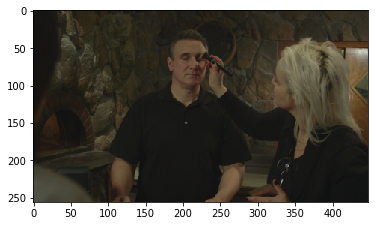

In [60]:
plt.imshow(y.numpy().astype(int))

In [61]:
# check dims
